In [1]:
import numpy as np
import matplotlib.pylab as plt


In [2]:
x = np.linspace(0,1,51)
print(x)
f = 1. / (1. + np.exp(80.*(np.abs(x-0.5) - 0.15)))
#f = np.sin(x*2.*np.pi)

[ 0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18  0.2   0.22
  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38  0.4   0.42  0.44  0.46
  0.48  0.5   0.52  0.54  0.56  0.58  0.6   0.62  0.64  0.66  0.68  0.7
  0.72  0.74  0.76  0.78  0.8   0.82  0.84  0.86  0.88  0.9   0.92  0.94
  0.96  0.98  1.  ]


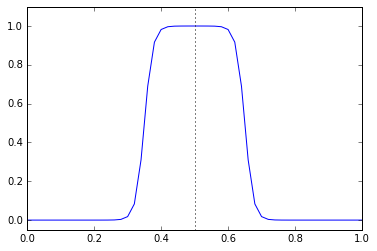

In [3]:
%matplotlib inline
plt.plot(x,f)
plt.ylim(-.05,1.1)
plt.axvline(0.5,color='k',linestyle='dotted')


In [4]:
#cnum = 1.0
#
exact_f = np.empty((251,51))
#exact[0,:] = f
#
#for i in range(1,251):
#    exact[i,0] = exact[i-1,0] - cnum*(q[i-1,0] - q[i-1,49])
#    for j in range(1,51):
#        exact[i,j] = exact[i-1,j] - cnum*(q[i-1,j] - q[i-1,j-1])
f2 = f
exact_f[0,:] = f2
for i in range(1,251):
    if (i%5 == 0):
        f2 = np.roll(f2,2)
    if ((i+50)%125 == 0):
        f2 = np.roll(f2,1)
    exact_f[i,:] = f2

In [5]:
print(exact_f[0])
print(exact_f[250])

[  6.91440011e-13   3.42472479e-12   1.69627729e-11   8.40171644e-11
   4.16139739e-10   2.06115362e-09   1.02089606e-08   5.05653109e-08
   2.50451575e-07   1.24049354e-06   6.14417460e-06   3.04315569e-05
   1.50710358e-04   7.46028834e-04   3.68423990e-03   1.79862100e-02
   8.31726965e-02   3.10025519e-01   6.89974481e-01   9.16827304e-01
   9.82013790e-01   9.96315760e-01   9.99253971e-01   9.99849290e-01
   9.99969568e-01   9.99993856e-01   9.99969568e-01   9.99849290e-01
   9.99253971e-01   9.96315760e-01   9.82013790e-01   9.16827304e-01
   6.89974481e-01   3.10025519e-01   8.31726965e-02   1.79862100e-02
   3.68423990e-03   7.46028834e-04   1.50710358e-04   3.04315569e-05
   6.14417460e-06   1.24049354e-06   2.50451575e-07   5.05653109e-08
   1.02089606e-08   2.06115362e-09   4.16139739e-10   8.40171644e-11
   1.69627729e-11   3.42472479e-12   6.91440011e-13]
[  6.91440011e-13   3.42472479e-12   1.69627729e-11   8.40171644e-11
   4.16139739e-10   2.06115362e-09   1.02089606e-0

In [7]:
cnum = 0.4

q = np.empty((251,51))
q[0,:] = f

for i in range(1,251):
    for j in range(51):
        #print(j)
        if (j == 0):
        #    print(j)
            q[i,j] = q[i-1,j] - cnum*(q[i-1,j] - q[i-1,49])
        else:
            q[i,j] = q[i-1,j] - cnum*(q[i-1,j] - q[i-1,j-1])
            #q[i,j] = q[i-1,j] - upwind(cnum,q,i,j)
TRER = np.sqrt(np.sum((f - q[250,:])**2./50.))
print TRER   

0.248628221612


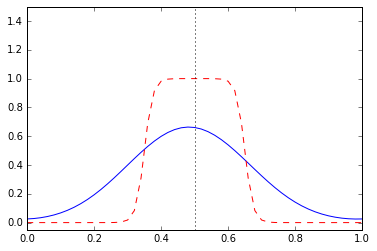

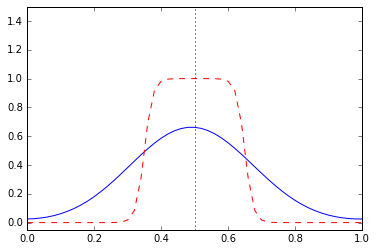

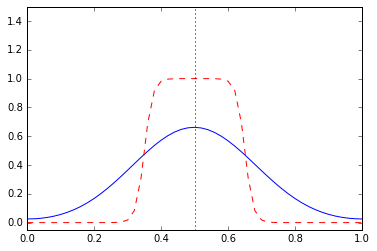

In [8]:
%matplotlib inline

for i in range(248,251):
    plt.plot(x,q[i,:])
    plt.plot(x,f,color='r',linestyle='dashed')
    plt.ylim(-.05,1.5)
    plt.axvline(0.5,color='k',linestyle='dotted')
    plt.show()

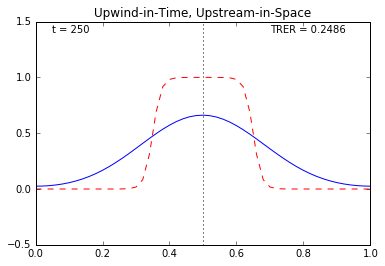

In [9]:
%matplotlib inline
from tempfile import NamedTemporaryFile
from IPython.display import HTML
from matplotlib import animation

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20,dpi=150,extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-0.5, 1.5))
plt.title('Upwind-in-Time, Upstream-in-Space')
line, = ax.plot([], [], lw=1)
line2, = ax.plot([], [], lw=1,ls='dashed',color='r')
time_template = 't = %.0f'
time_text = ax.text(0.05, 1.4, '')
ax.axvline(0.5,ls='dotted',color='k')
plt.text(0.7,1.4,'TRER = '+str(np.round(TRER,decimals=4)))
x2 = x

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line2.set_data([], [])
    time_text.set_text('')
    return line, line2, time_text

# animation function.  This is called sequentially
def animate(i):
    #x = np.linspace(0, 2, 1000)
    #y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, q[i,:])
    line2.set_data(x, exact_f[i,:])
    time_text.set_text(time_template % (i))
    return line, line2, time_text

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=251, interval=20, blit=True)

# call our new function to display the animation
fname = 'upwind_upstream_box.mp4'
anim.save(fname, fps=20,dpi=500)
#display_animation(anim)

In [17]:
# Leapfrog in time and space

cnum = 0.4
gamma = 0.025

qc = np.empty((251,51))
qf = np.empty((251,51))
qc[0,:] = f
qf[0,:] = f

# First time step
qc[1,0] = qc[0,0] - cnum*(qc[0,1]-qc[0,49])
for j in range(1,50):
    qc[1,j] = qc[0,j] - cnum*(qc[0,j+1]-qc[0,j-1])
qc[1,50] = qc[1,0]
    
for i in range(2,251):
    qc[i,0] = qf[i-2,0] - cnum*(qc[i-1,1] - qc[i-1,48])
    for j in range(1,49):
        qc[i,j] = qf[i-2,j] - cnum*(qc[i-1,j+1] - qc[i-1,j-1])
    qc[i,49] = qc[i,0] # BC
    qc[i,50] = qc[i,1] # BC
    
    # Asselin Filter to control computational mode with Leapfrog in time
    for j in range(51):
        qf[i-1,j] = qc[i-1,j] + gamma*(qc[i,j]-2*qc[i-1,j]+qf[i-2,j])
TRER = np.sqrt(np.sum((f - qc[250,:])**2./50.))
print TRER

0.173899080862


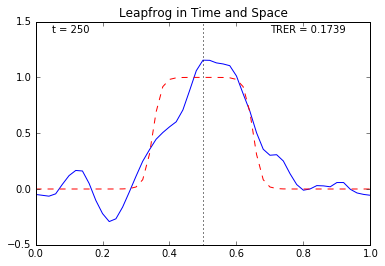

In [18]:
%matplotlib inline
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-0.5, 1.5))
plt.title('Leapfrog in Time and Space')
line, = ax.plot([], [], lw=1)
line2, = ax.plot([], [], lw=1,ls='dashed',color='r')
time_template = 't = %.0f'
time_text = ax.text(0.05, 1.4, '')
ax.axvline(0.5,ls='dotted',color='k')
plt.text(0.7,1.4,'TRER = '+str(np.round(TRER,decimals=4)))
x2 = x

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line2.set_data([], [])
    time_text.set_text('')
    return line, line2, time_text

# animation function.  This is called sequentially
def animate(i):
    #x = np.linspace(0, 2, 1000)
    #y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, qc[i,:])
    line2.set_data(x, exact_f[i,:])
    time_text.set_text(time_template % (i))
    return line, line2, time_text

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=251, interval=20, blit=True)

# call our new function to display the animation
#display_animation(anim)

# To same animation, comment out previous line and
# uncomment the next two lines.
fname = 'leapfrog_time_space_box.mp4'
anim.save(fname, fps=20,dpi=500)



In [22]:
# BAD Leapfrog in time and space

cnum = 0.4
gamma = 0.025

qc = np.empty((251,51))
qf = np.empty((251,51))
qc[0,:] = f
qf[0,:] = f

# First time step
qc[1,0] = qc[0,0] - cnum*(qc[0,1]-qc[0,49])
for j in range(1,50):
    qc[1,j] = qc[0,j] - cnum*(qc[0,j+1]-qc[0,j-1])
qc[1,50] = qc[1,0]
    
for i in range(2,251):
    qc[i,0] = qc[i-1,0] - cnum*(qc[i-1,1] - qc[i-1,48])
    for j in range(1,49):
        qc[i,j] = qc[i-1,j] - cnum*(qc[i-1,j+1] - qc[i-1,j-1])
    qc[i,49] = qc[i,0] # BC
    qc[i,50] = qc[i,1] # BC
    
    # Asselin Filter to control computational mode with Leapfrog in time
    #for j in range(51):
    #    qf[i-1,j] = qc[i-1,j] + gamma*(qc[i,j]-2*qc[i-1,j]+qf[i-2,j])
TRER = np.sqrt(np.sum((f - qc[250,:])**2./50.))
print TRER

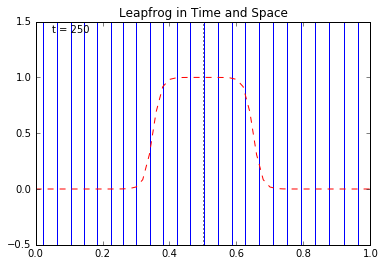

In [24]:
%matplotlib inline
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-0.5, 1.5))
plt.title('Leapfrog in Time and Space')
line, = ax.plot([], [], lw=1)
line2, = ax.plot([], [], lw=1,ls='dashed',color='r')
time_template = 't = %.0f'
time_text = ax.text(0.05, 1.4, '')
ax.axvline(0.5,ls='dotted',color='k')
plt.text(0.7,1.4,'TRER = '+str(np.round(TRER,decimals=4)))
x2 = x

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line2.set_data([], [])
    time_text.set_text('')
    return line, line2, time_text

# animation function.  This is called sequentially
def animate(i):
    #x = np.linspace(0, 2, 1000)
    #y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, qc[i,:])
    line2.set_data(x, exact_f[i,:])
    time_text.set_text(time_template % (i))
    return line, line2, time_text

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=251, interval=20, blit=True)

# call our new function to display the animation
#display_animation(anim)

# To same animation, comment out previous line and
# uncomment the next two lines.
fname = 'leapfrog_time_space_no_filter_box.mp4'
anim.save(fname, fps=20,dpi=500)

In [13]:
# Fourth Order Spatial, Leapfrog in Time
cnum = 0.4
gamma = 0.025

qc4 = np.empty((251,51))
qf4 = np.empty((251,51))
qc4[0,:] = f
qf4[0,:] = f

# First time step, upwind
qc4[1,0] = qc4[0,0] - cnum*(qc4[0,1]-qc4[0,49])
for j in range(1,50):
    qc4[1,j] = qc4[0,j] - cnum*(qc4[0,j+1]-qc4[0,j-1])
qc4[1,50] = qc4[1,0]
    
for i in range(2,251):
    qc4[i,0] = qf4[i-2,0] - cnum*2.*(8.*(qc4[i-1,1]-qc4[i-1,49]) - qc4[i-1,2] + qc4[i-1,48])/12.
    qc4[i,1] = qf4[i-2,1] - cnum*2.*(8.*(qc4[i-1,2]-qc4[i-1,0]) - qc4[i-1,2] + qc4[i-1,49])/12.
    for j in range(2,49):
        qc4[i,j] = qf4[i-2,j] - cnum*2.*(8.*(qc4[i-1,j+1]-qc4[i-1,j-1]) - qc4[i-1,j+2] + qc4[i-1,j-2])/12.

    # BCs
    qc4[i,49] = qf4[i-2,49] - cnum*2.*(8.*(qc4[i-1,0]-qc4[i-1,48]) - qc4[i-1,1] + qc4[i-1,47])/12.
    qc4[i,50] = qc4[i,0]
    
    # Asselin Filter to control computational mode with Leapfrog in time
    for j in range(51):
        qf4[i-1,j] = qc4[i-1,j] + gamma*(qc4[i,j]-2*qc4[i-1,j]+qf4[i-2,j])
TRER = np.sqrt(np.sum((f - qc4[250,:])**2./50.))
print TRER

0.0663269477829


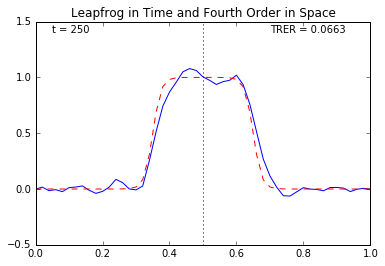

In [14]:
%matplotlib inline
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-0.5, 1.5))
plt.title('Leapfrog in Time and Fourth Order in Space')
line, = ax.plot([], [], lw=1)
line2, = ax.plot([], [], lw=1,ls='dashed',color='r')
time_template = 't = %.0f'
time_text = ax.text(0.05, 1.4, '')
ax.axvline(0.5,ls='dotted',color='k')
plt.text(0.7,1.4,'TRER = '+str(np.round(TRER,decimals=4)))
x2 = x

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line2.set_data([], [])
    time_text.set_text('')
    return line, line2, time_text

# animation function.  This is called sequentially
def animate(i):
    #x = np.linspace(0, 2, 1000)
    #y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, qc4[i,:])
    line2.set_data(x, exact_f[i,:])
    time_text.set_text(time_template % (i))
    return line, line2, time_text

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=251, interval=20, blit=True)

# call our new function to display the animation
#display_animation(anim)

# To same animation, comment out previous line and
# uncomment the next two lines.
fname = 'leapfrog_time_4th_order_space_box.mp4'
anim.save(fname, fps=20,dpi=500)

In [ ]:
# Third Order spatial

# First time step
# Initial point
#cnum/12.*((7.*(qc[0,0]+qc[0,49]) - (qc[0,1]+qc[0,48])) 
#        - (3.*(qc[0,0]-qc[0,49]) - (qc[0,1]-qc[0,48])))

# Other points
#cnum/12.*((7.*(qc[0,j]+qc[0,j-1]) - (qc[0,j+1]+qc[0,j-2])) 
#        - (3.*(qc[0,j]-qc[0,j-1]) - (qc[0,j+1]-qc[0,j-2])))

# Time Integration
# First Point
#cnum/12.*((7.*(qc[i-1,0]+qc[i-1,49]) - (qc[i-1,1]+qc[i-1,48])) 
#        - (3.*(qc[i-1,0]-qc[i-1,49]) - (qc[i-1,1]-qc[i-1,48])))

# Other points
#cnum/12.*((7.*(qc[i-1,j]+qc[i-1,j-1]) - (qc[i-1,j+1]+qc[i-1,j-2])) 
#        - (3.*(qc[i-1,j]-qc[i-1,j-1]) - (qc[i-1,j+1]-qc[i-1,j-2])))

In [15]:
# Sixth Order Spatial, Leapfrog in time
cnum = 0.4
gamma = 0.025

qc6 = np.empty((251,51))
qf6 = np.empty((251,51))
qc6[0,:] = f
qf6[0,:] = f

# First time step, upwind
qc6[1,0] = qc6[0,0] - cnum*(qc6[0,1]-qc6[0,49])
for j in range(1,50):
    qc6[1,j] = qc6[0,j] - cnum*(qc6[0,j+1]-qc6[0,j-1])
qc6[1,50] = qc6[1,0]


for i in range(2,251):
    qc6[i,0] = qf6[i-2,0] - cnum*2.*(45.*(qc6[i-1,1]-qc6[i-1,49]) + 9.*(qc6[i-1,48] - qc6[i-1,2]) 
                                   + qc6[i-1,3] - qc6[i-1,47])/60.
    qc6[i,1] = qf6[i-2,1] - cnum*2.*(45.*(qc6[i-1,2]-qc6[i-1,0]) + 9.*(qc6[i-1,49] - qc6[i-1,3]) 
                                   + qc6[i-1,4] - qc6[i-1,48])/60.
    qc6[i,2] = qf6[i-2,2] - cnum*2.*(45.*(qc6[i-1,3]-qc6[i-1,1]) + 9.*(qc6[i-1,0] - qc6[i-1,4]) 
                                   + qc6[i-1,5] - qc6[i-1,49])/60.
    
    for j in range(3,48):
        qc6[i,j] = qf6[i-2,j] - cnum*2.*(45.*(qc6[i-1,j+1]-qc6[i-1,j-1]) + 9.*(qc6[i-1,j-2] - qc6[i-1,j+2]) 
                                       + qc6[i-1,j+3] - qc6[i-1,j-3])/60.
    # BCs
    qc6[i,48] = qf6[i-2,48] - cnum*2.*(45.*(qc6[i-1,49]-qc6[i-1,47]) + 9.*(qc6[i-1,46] - qc6[i-1,0])
                                     + qc6[i-1,1] - qc6[i-1,45])/60.
    qc6[i,49] = qf6[i-2,49] - cnum*2.*(45.*(qc6[i-1,0]-qc6[i-1,48]) + 9.*(qc6[i-1,47] - qc6[i-1,1])
                                     + qc6[i-1,1] - qc6[i-1,46])/60.
    qc6[i,50] = qc6[i,0]
    
    # Asselin Filter to control computational mode with Leapfrog in time
    for j in range(51):
        qf6[i-1,j] = qc6[i-1,j] + gamma*(qc6[i,j]-2*qc6[i-1,j]+qf6[i-2,j])
TRER = np.sqrt(np.sum((f - qc6[250,:])**2./50.))
print TRER

0.0949790833885


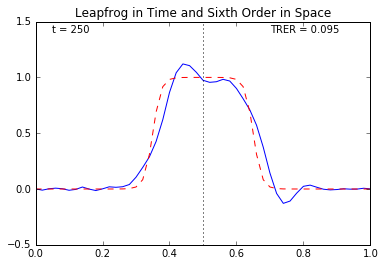

In [16]:
%matplotlib inline
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-0.5, 1.5))
plt.title('Leapfrog in Time and Sixth Order in Space')
line, = ax.plot([], [], lw=1)
line2, = ax.plot([], [], lw=1,ls='dashed',color='r')
time_template = 't = %.0f'
time_text = ax.text(0.05, 1.4, '')
ax.axvline(0.5,ls='dotted',color='k')
plt.text(0.7,1.4,'TRER = '+str(np.round(TRER,decimals=4)))
x2 = x

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line2.set_data([], [])
    time_text.set_text('')
    return line, line2, time_text

# animation function.  This is called sequentially
def animate(i):
    #x = np.linspace(0, 2, 1000)
    #y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, qc6[i,:])
    line2.set_data(x, exact_f[i,:])
    time_text.set_text(time_template % (i))
    return line, line2, time_text

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=251, interval=20, blit=True)

# call our new function to display the animation
#display_animation(anim)

# To same animation, comment out previous line and
# uncomment the next two lines.
fname = 'leapfrog_time_6th_order_space_box.mp4'
anim.save(fname, fps=20,dpi=500)

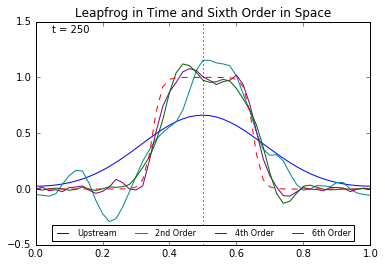

In [33]:
%matplotlib inline
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-0.5, 1.5))
plt.title('Leapfrog in Time and Sixth Order in Space')
line, = ax.plot([], [], lw=1, label='Upstream')
line2, = ax.plot([], [], lw=1, c='darkcyan', label='2nd Order')
line4, = ax.plot([], [], lw=1, c='purple', label='4th Order')
line6, = ax.plot([], [], lw=1, c='darkgreen', label='6th Order')
line_ex, = ax.plot([], [], lw=1,ls='dashed',color='r')
time_template = 't = %.0f'
time_text = ax.text(0.05, 1.4, '')
ax.axvline(0.5,ls='dotted',color='k')
ax.legend(handles=[line,line2,line4,line6],loc='lower center',fontsize=8,ncol=4)
x2 = x

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line2.set_data([], [])
    line4.set_data([], [])
    line6.set_data([], [])
    line_ex.set_data([], [])
    time_text.set_text('')
    return line, line2, line4, line6, line_ex, time_text

# animation function.  This is called sequentially
def animate(i):
    #x = np.linspace(0, 2, 1000)
    #y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, q[i,:])
    line2.set_data(x, qc[i,:])
    line4.set_data(x, qc4[i,:])
    line6.set_data(x, qc6[i,:])
    line_ex.set_data(x, exact_f[i,:])
    time_text.set_text(time_template % (i))
    return line, line2, line4, line6, line_ex, time_text

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=251, interval=20, blit=True)

# call our new function to display the animation
#display_animation(anim)

# To same animation, comment out previous line and
# uncomment the next two lines.
fname = 'leapfrog_time_all_box.mp4'
anim.save(fname, fps=20,dpi=500)